In [1]:
import pandas as pd 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model 

In [3]:
df = pd.read_excel('Linear regression project.xlsx')
df.head()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.0,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.0,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.0,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.0,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.0,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years


In [4]:
df.dtypes

ID                                float64
Amount.Requested                    int64
Amount.Funded.By.Investors        float64
Interest.Rate                     float64
Loan.Length                        object
Loan.Purpose                       object
Debt.To.Income.Ratio              float64
Home.Ownership                     object
Monthly.Income                    float64
Open.CREDIT.Lines                   int64
Revolving.CREDIT.Balance            int64
Inquiries.in.the.Last.6.Months      int64
Employment.Length                  object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2499 non-null   float64
 1   Amount.Requested                2500 non-null   int64  
 2   Amount.Funded.By.Investors      2500 non-null   float64
 3   Interest.Rate                   2500 non-null   float64
 4   Loan.Length                     2499 non-null   object 
 5   Loan.Purpose                    2499 non-null   object 
 6   Debt.To.Income.Ratio            2500 non-null   float64
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2500 non-null   float64
 9   Open.CREDIT.Lines               2500 non-null   int64  
 10  Revolving.CREDIT.Balance        2500 non-null   int64  
 11  Inquiries.in.the.Last.6.Months  2500 non-null   int64  
 12  Employment.Length               24

In [6]:
df.isna().sum()

ID                                 1
Amount.Requested                   0
Amount.Funded.By.Investors         0
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               0
Home.Ownership                     1
Monthly.Income                     0
Open.CREDIT.Lines                  0
Revolving.CREDIT.Balance           0
Inquiries.in.the.Last.6.Months     0
Employment.Length                 78
dtype: int64

In [7]:
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.00,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.00,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.00,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.00,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.00,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,23735.0,30000,29950.00,0.17,60 months,debt_consolidation,0.19,MORTGAGE,9250.00,15,45880,1,8 years
2496,65882.0,16000,16000.00,0.14,60 months,home_improvement,0.22,OWN,8903.25,18,18898,1,10+ years
2497,55610.0,10000,10000.00,0.14,36 months,debt_consolidation,0.05,MORTGAGE,2166.67,4,4544,0,10+ years
2498,38576.0,6000,6000.00,0.12,36 months,major_purchase,0.17,RENT,3500.00,8,1275,0,5 years


In [8]:
df.nunique()

ID                                2499
Amount.Requested                   380
Amount.Funded.By.Investors         708
Interest.Rate                       21
Loan.Length                          3
Loan.Purpose                        14
Debt.To.Income.Ratio                36
Home.Ownership                       5
Monthly.Income                     632
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   10
dtype: int64

In [9]:
df.duplicated(subset=['Amount.Requested'],keep=False)

0       True
1       True
2       True
3       True
4       True
        ... 
2495    True
2496    True
2497    True
2498    True
2499    True
Length: 2500, dtype: bool

In [10]:
gp=df.groupby('Amount.Requested').size()
gp.head()

Amount.Requested
1000    18
1125     1
1200     6
1400     3
1450     1
dtype: int64

In [11]:
df.nunique()

ID                                2499
Amount.Requested                   380
Amount.Funded.By.Investors         708
Interest.Rate                       21
Loan.Length                          3
Loan.Purpose                        14
Debt.To.Income.Ratio                36
Home.Ownership                       5
Monthly.Income                     632
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   10
dtype: int64

In [12]:
df.drop_duplicates(subset=['Amount.Requested'],inplace=True)
df

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,81174.0,20000,20000.0,0.09,36 months,debt_consolidation,0.15,MORTGAGE,6541.67,14,14272,2,1 year
1,99592.0,19200,19200.0,0.12,36 months,debt_consolidation,0.28,MORTGAGE,4583.33,12,11140,1,2 years
2,80059.0,35000,35000.0,0.22,60 months,debt_consolidation,0.24,MORTGAGE,11500.00,14,21977,1,2 years
3,15825.0,10000,9975.0,0.10,36 months,debt_consolidation,0.14,MORTGAGE,3833.33,10,9346,0,5 years
4,33182.0,12000,12000.0,0.12,36 months,credit_card,0.19,RENT,3195.00,11,14469,0,9 years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,79820.0,25875,25875.0,0.18,60 months,debt_consolidation,0.14,MORTGAGE,6000.00,8,12316,2,10+ years
2466,92038.0,22750,22750.0,0.22,60 months,home_improvement,0.29,OWN,4333.33,15,11567,1,1 year
2472,49533.0,17300,17250.0,0.22,60 months,wedding,0.04,MORTGAGE,5500.00,11,2306,3,4 years
2489,63256.0,19075,19075.0,0.19,36 months,debt_consolidation,0.15,RENT,5166.67,17,13749,3,10+ years


In [13]:
df.describe()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,56423.807895,13231.973684,12799.127105,0.136421,0.165658,5348.496895,10.057895,15351.268421,0.865789
std,28890.272016,8239.491632,8310.901170,0.043292,0.075625,5682.379787,4.329053,17323.705444,1.176008
min,17.000000,1000.000000,200.000000,0.050000,0.000000,666.670000,2.000000,0.000000,0.000000
25%,33037.750000,6562.500000,6056.250000,0.100000,0.110000,3333.330000,7.000000,6367.250000,0.000000
50%,58928.000000,11912.500000,11362.500000,0.140000,0.160000,4583.330000,9.000000,11207.500000,1.000000
75%,79733.000000,18631.250000,18406.250000,0.170000,0.220000,6025.000000,13.000000,18913.500000,1.000000
max,103218.000000,35000.000000,35000.000000,0.240000,0.340000,102750.000000,25.000000,217827.000000,9.000000


In [14]:
df.corr()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
ID,1.000000,0.197388,0.247795,0.254870,0.224371,-0.034803,0.188001,0.104385,0.124743
Amount.Requested,0.197388,1.000000,0.946643,0.381223,0.145515,0.293385,0.245228,0.273258,-0.061913
Amount.Funded.By.Investors,0.247795,0.946643,1.000000,0.383232,0.181764,0.268437,0.247140,0.270189,-0.092030
Interest.Rate,0.254870,0.381223,0.383232,1.000000,0.150943,-0.005498,0.126266,0.063045,0.103001
Debt.To.Income.Ratio,0.224371,0.145515,0.181764,0.150943,1.000000,-0.168431,0.388106,0.149911,0.014198
Monthly.Income,-0.034803,0.293385,0.268437,-0.005498,-0.168431,1.000000,0.081158,0.355870,-0.021957
Open.CREDIT.Lines,0.188001,0.245228,0.247140,0.126266,0.388106,0.081158,1.000000,0.216937,0.133690
Revolving.CREDIT.Balance,0.104385,0.273258,0.270189,0.063045,0.149911,0.355870,0.216937,1.000000,0.016235
Inquiries.in.the.Last.6.Months,0.124743,-0.061913,-0.092030,0.103001,0.014198,-0.021957,0.133690,0.016235,1.000000


In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

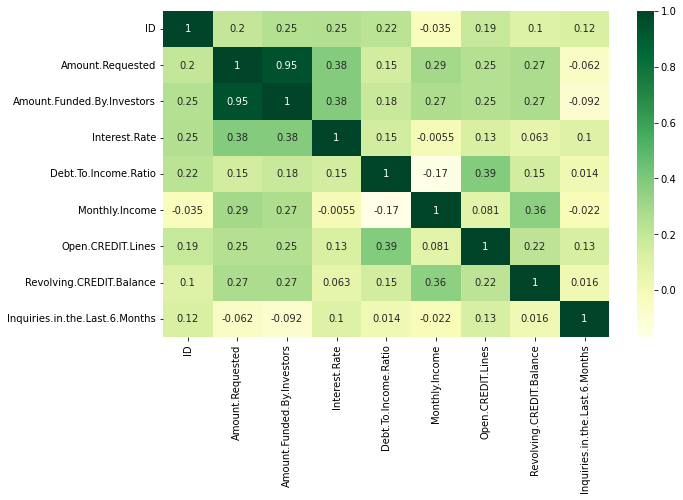

In [16]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGn')

<AxesSubplot:>

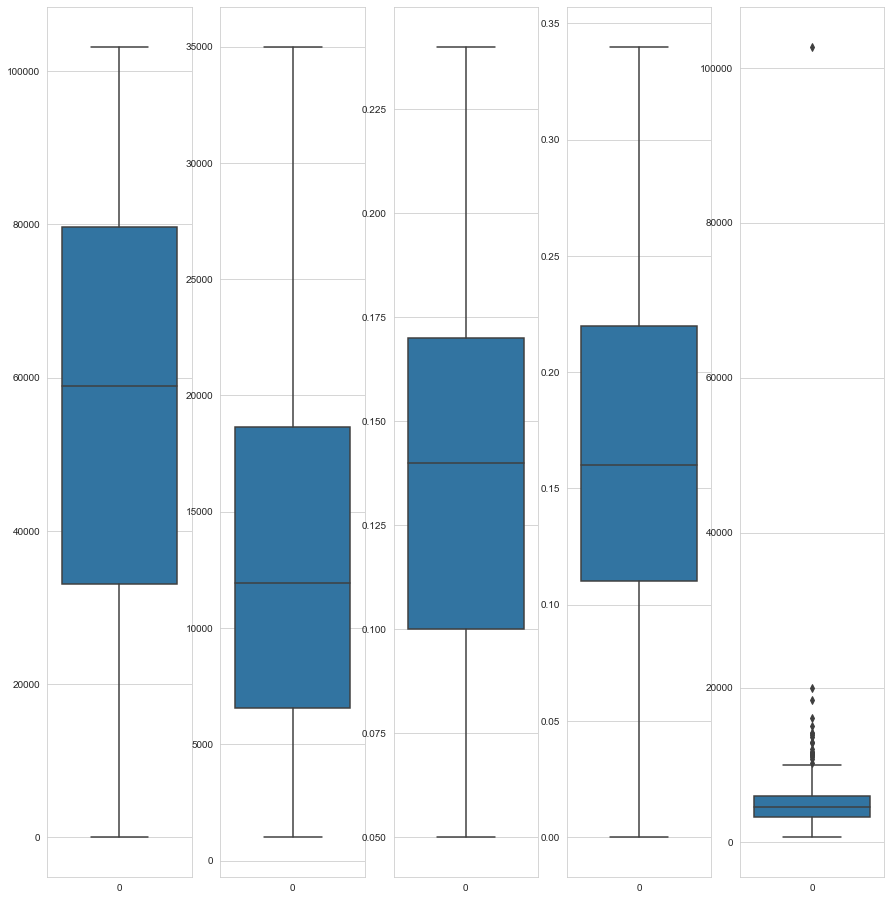

In [17]:
plt.figure(figsize=(15,16))
sns.set_style('whitegrid')
plt.subplot(1,5,1)
sns.boxplot(data=df['ID'])
plt.subplot(1,5,2)
sns.boxplot(data=df['Amount.Requested'])
plt.subplot(1,5,3)
sns.boxplot(data=df['Interest.Rate'])
plt.subplot(1,5,4)
sns.boxplot(data=df['Debt.To.Income.Ratio'])
plt.subplot(1,5,5)
sns.boxplot(data=df['Monthly.Income'])

In [18]:
df.shape

(380, 13)

In [19]:
df.isna()

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,False,False,False,False,False,False,False,False,False,False,False,False,False
2466,False,False,False,False,False,False,False,False,False,False,False,False,False
2472,False,False,False,False,False,False,False,False,False,False,False,False,False
2489,False,False,False,False,False,False,False,False,False,False,False,False,False


In [20]:
#import numpy as np
x=pd.DataFrame(data=df['Amount.Requested'],columns=('Amount.Requested',))
x.head()

,Amount.Requested
0,20000
1,19200
2,35000
3,10000
4,12000


In [21]:
y=pd.DataFrame(data=df['Interest.Rate'],columns=('Interest.Rate',))
y.head()

,Interest.Rate
0,0.09
1,0.12
2,0.22
3,0.10
4,0.12


Text(0, 0.5, 'Interest.Rate')

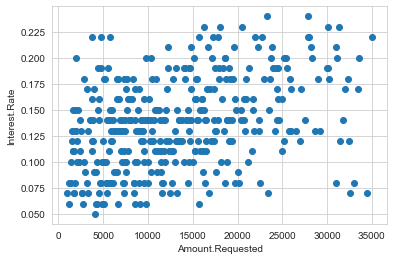

In [22]:
plt.scatter(x,y)
plt.xlabel("Amount.Requested")
plt.ylabel("Interest.Rate")

In [23]:
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,
                                                random_state=4)

NameError: name 'train_test_split' is not defined

In [ ]:
print(x_train)

In [ ]:
print(y_train)

In [ ]:
print(x_test)

In [ ]:
print(y_test)

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

In [ ]:
reg.coef_

In [ ]:
reg.intercept_

In [ ]:
y_predicted=reg.predict(x_train)
print(y_predicted)

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score

In [ ]:
mse=mean_squared_error(y_train,y_predicted)
mse 

In [ ]:
r2e=r2_score(y_train,y_predicted)
r2e 

In [ ]:
y_pred=reg.predict(x_test)
print(y_predicted)

In [ ]:
mse=mean_squared_error(y_test,y_pred)
mse 

In [ ]:
r2e=r2_score(y_test,y_pred)
r2e 

In [ ]:
plt.scatter(x_test,y_test,color='black')
plt.scatter(x_test,y_pred,color='blue')
plt.show()

In [ ]:
plt.scatter(x_test,y_test,color='black')
plt.scatter(x_test,y_pred, color='blue')
a=y_test.to_numpy()
m=np.mean(a)
plt.plot(x_test,[m]*len(a),color='red')
plt.show()

In [ ]:
import statsmodels.api as sm
x2 = sm.add_constant(x)
est=sm.OLS(y,x2)
est2=est.fit()
est2.summary() 

In [ ]:
# Generate a Two Column DataFrame
df= pd.DataFrame()
df = pd.DataFrame()
df['Amount.Requested']=x 
df['Interest.Rate'] = y

# Split and Label the Data
x_train, x_test = train_test_split(df)
x_train['Type'] = 'Train'
x_test['Type'] = 'Test'

# Combine the Data
final_df = x_train.append(x_test)

# Visualize the Data
sns.set_style('darkgrid')
sns.set_palette('pastel')
sns.catplot(data=final_df, x='Type', y='Type', hue='Type')
plt.show()